In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset_df = pd.read_csv('/kaggle/input/spaceship-titanic-ut-komaba-2025/train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (8693, 14)


In [5]:
dataset_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

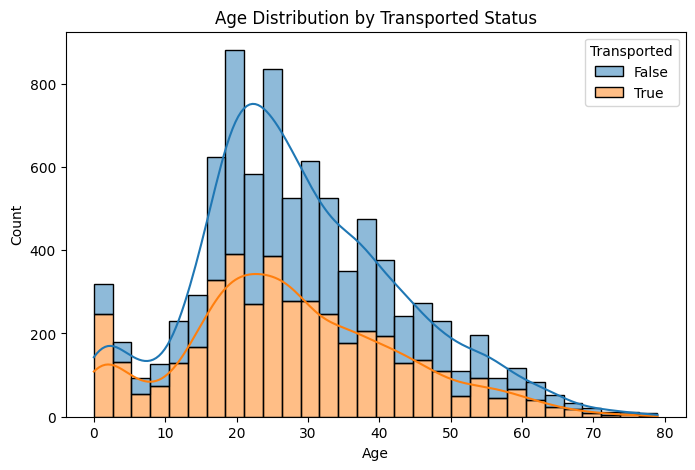

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=dataset_df,
    x='Age',
    hue='Transported',  # 'Transported'の値によって色分けする
    multiple='stack',   # 棒を積み重ねる
    kde=True,           # カーネル密度推定の線を追加
    bins=30             # ビンの数
);
plt.title('Age Distribution by Transported Status')
plt.show()

--- 年齢ごとのTransported比率（一部抜粋） ---
   Age  Transported_Ratio
0  0.0           0.808989
1  1.0           0.731343
2  2.0           0.706667
3  3.0           0.786667
4  4.0           0.746479
5  5.0           0.606061
6  6.0           0.575000
7  7.0           0.615385
8  8.0           0.565217
9  9.0           0.571429


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


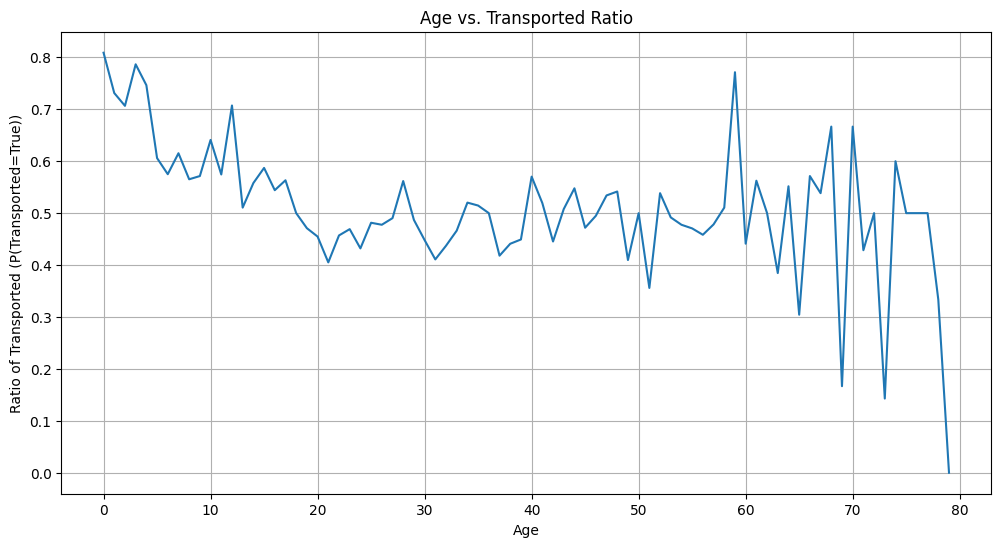

In [7]:
# 年齢ごとにTransportedの平均（比率）を計算
# 結果として、各年齢におけるTransported = True の割合が得られます。
age_transport_ratio = dataset_df.groupby('Age')['Transported'].mean().reset_index()

# 列名を分かりやすく変更
age_transport_ratio.columns = ['Age', 'Transported_Ratio']

print("--- 年齢ごとのTransported比率（一部抜粋） ---")
print(age_transport_ratio.head(10))

# -------------------------------------------------------------
# 結果を可視化する（オプション）

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=age_transport_ratio, 
    x='Age', 
    y='Transported_Ratio'
)
plt.title('Age vs. Transported Ratio')
plt.xlabel('Age')
plt.ylabel('Ratio of Transported (P(Transported=True))')
plt.grid(True)
plt.show()

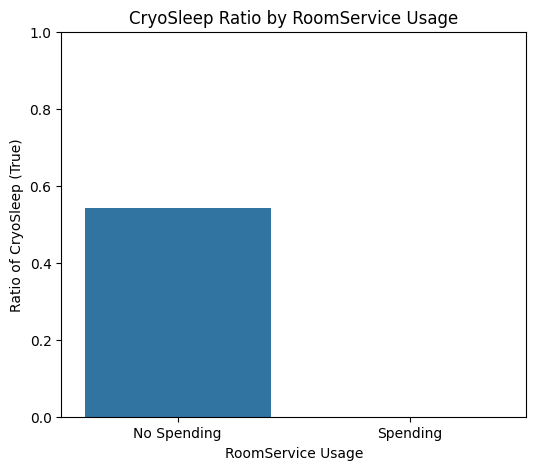

In [8]:
# RoomServiceの利用有無を判断するカテゴリ列を作成
# 0以外の値を支払った場合を 'Spending', 0の場合を 'No Spending' とする
dataset_df['RS_Used'] = dataset_df['RoomService'].apply(lambda x: 'Spending' if x > 0 else 'No Spending')

# 利用有無でグループ化し、CryoSleepの平均（Trueの割合）を計算
# CryoSleepがTrue/Falseの場合、平均はTrueの割合となる
cryo_by_rs_use = dataset_df.groupby('RS_Used')['CryoSleep'].mean().reset_index()

# グラフ化
plt.figure(figsize=(6, 5))
sns.barplot(
    data=cryo_by_rs_use,
    x='RS_Used',
    y='CryoSleep',
    order=['No Spending', 'Spending'] # 順番を明示的に指定
)
plt.title('CryoSleep Ratio by RoomService Usage')
plt.xlabel('RoomService Usage')
plt.ylabel('Ratio of CryoSleep (True)')
plt.ylim(0, 1)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


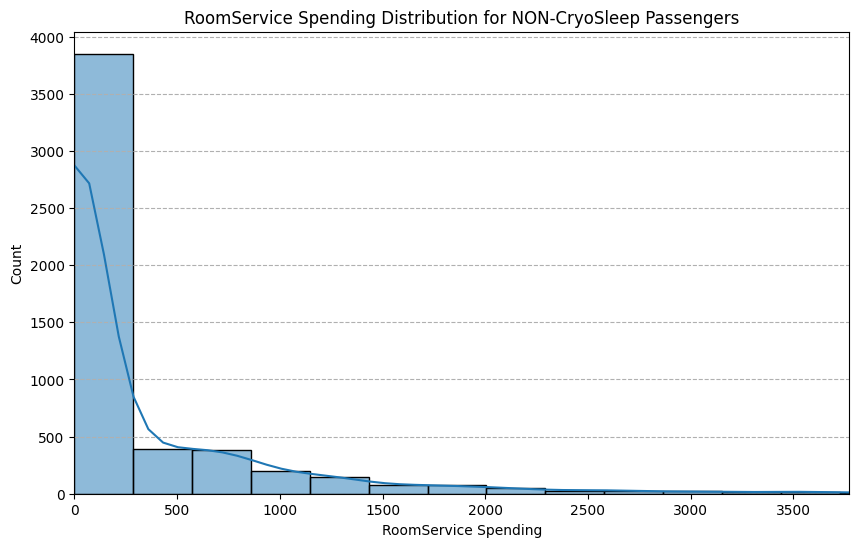

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# CryoSleepがFalseの乗客にデータセットを絞り込む
non_cryo_df = dataset_df[dataset_df['CryoSleep'] == False]

plt.figure(figsize=(10, 6))
# 絞り込んだデータセットに対してヒストグラムを作成
sns.histplot(
    data=non_cryo_df,
    x='RoomService',
    bins=50, # ビン数を増やすことで詳細な分布を見る
    kde=True # カーネル密度推定の曲線も追加
)
plt.title('RoomService Spending Distribution for NON-CryoSleep Passengers')
plt.xlabel('RoomService Spending')
plt.ylabel('Count')
# 分布の右側の外れ値が多いと見づらくなるため、表示範囲を限定することが推奨される
# 例として、上位99%の値で表示範囲を限定する
max_val = non_cryo_df['RoomService'].quantile(0.99)
plt.xlim(0, max_val * 1.05) 
plt.grid(axis='y', linestyle='--')
plt.show()

In [10]:
# 低温睡眠されていない (CryoSleep=False) かつ RoomServiceが0 の乗客をカウント
count_non_cryo_zero_rs = dataset_df[
    (dataset_df['CryoSleep'] == False) & (dataset_df['RoomService'] == 0)
].shape[0]

# CryoSleep=False の乗客全体をカウント
total_non_cryo = dataset_df[dataset_df['CryoSleep'] == False].shape[0]

# 割合を計算
ratio_zero_rs = count_non_cryo_zero_rs / total_non_cryo * 100

print(f"低温睡眠されていない乗客 (CryoSleep=False) の総数: {total_non_cryo} 人")
print(f"そのうち、RoomServiceの利用額が 0 の乗客数: {count_non_cryo_zero_rs} 人")
print(f"RoomServiceが 0 の乗客の割合: {ratio_zero_rs:.2f} %")

低温睡眠されていない乗客 (CryoSleep=False) の総数: 5439 人
そのうち、RoomServiceの利用額が 0 の乗客数: 2464 人
RoomServiceが 0 の乗客の割合: 45.30 %


In [12]:
# 低温睡眠されていない (CryoSleep=False) かつ RoomServiceが0 の乗客をカウント
count_non_cryo_zero_rs = dataset_df[
    (dataset_df['CryoSleep'] == True) & (dataset_df['RoomService'] == 0)
].shape[0]

# CryoSleep=False の乗客全体をカウント
total_non_cryo = dataset_df[dataset_df['CryoSleep'] == True].shape[0]

# 割合を計算
ratio_zero_rs = count_non_cryo_zero_rs / total_non_cryo * 100

print(f"低温睡眠されている乗客 (CryoSleep=True) の総数: {total_non_cryo} 人")
print(f"そのうち、RoomServiceの利用額が 0 の乗客数: {count_non_cryo_zero_rs} 人")
print(f"RoomServiceが 0 の乗客の割合: {ratio_zero_rs:.2f} %")

低温睡眠されている乗客 (CryoSleep=True) の総数: 3037 人
そのうち、RoomServiceの利用額が 0 の乗客数: 2969 人
RoomServiceが 0 の乗客の割合: 97.76 %


--- VIPステータスごとのTransported比率 ---
     VIP  Transported_Ratio
0  False           0.506332
1   True           0.381910


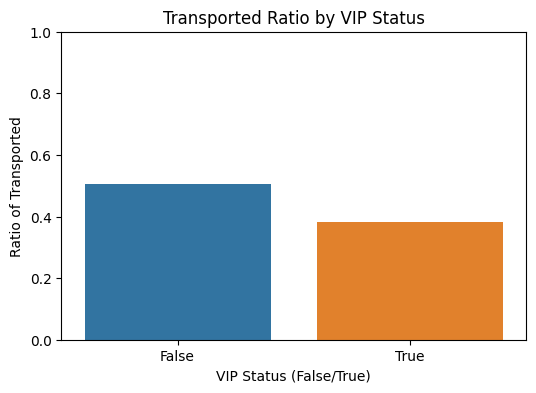

In [13]:
# VIPステータスごとにTransportedの平均（比率）を計算
# 結果として、VIP=True と VIP=False のそれぞれのTransported比率が得られます。

vip_transport_ratio = dataset_df.groupby('VIP')['Transported'].mean().reset_index()

# 列名を分かりやすく変更
vip_transport_ratio.columns = ['VIP', 'Transported_Ratio']

print("--- VIPステータスごとのTransported比率 ---")
print(vip_transport_ratio)

# -------------------------------------------------------------
# 結果を可視化する（オプション）

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(
    data=vip_transport_ratio, 
    x='VIP', 
    y='Transported_Ratio'
)
plt.title('Transported Ratio by VIP Status')
plt.xlabel('VIP Status (False/True)')
plt.ylabel('Ratio of Transported')
plt.ylim(0, 1) # 比率は0から1の間に限定
plt.show()

--- RoomService利用額ごとのTransported比率 ---
  RoomService_Group  Transported_Ratio
0              Zero           0.562988
1               Low           0.170455
2            Medium           0.135246
3              High           0.053763


/tmp/ipykernel_37/1985518073.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rs_transport_ratio = dataset_df.groupby('RoomService_Group')['Transported'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


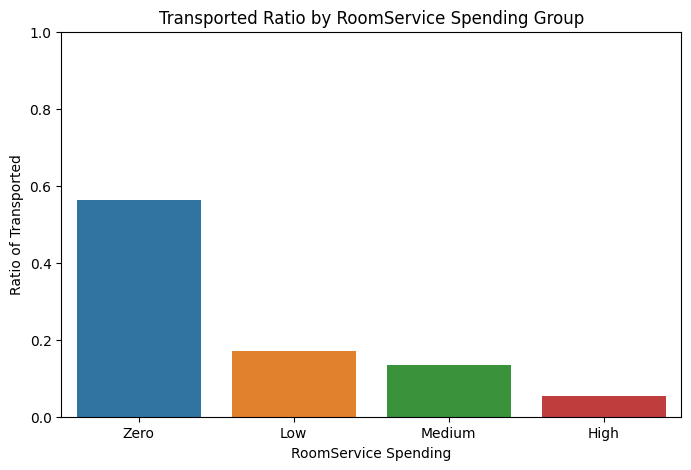

In [14]:
# RoomServiceの利用額を区間に分けるための境界値を定義
# 例として、0、500、1500、3000、最大値の5つの区間に分ける
bins = [0, 500, 1500, 3000, dataset_df['RoomService'].max() + 1] 
labels = ['Zero', 'Low', 'Medium', 'High']

# RoomServiceの利用額をカテゴリ変数に変換
dataset_df['RoomService_Group'] = pd.cut(
    dataset_df['RoomService'], 
    bins=bins, 
    labels=labels, 
    right=False, # 最後の値を含めない（例：[0, 500) は 0以上500未満）
    include_lowest=True # 最初の値を含める（0を含める）
)

# 新しいグループごとにTransportedの平均（比率）を計算
rs_transport_ratio = dataset_df.groupby('RoomService_Group')['Transported'].mean().reset_index()

# 列名を分かりやすく変更
rs_transport_ratio.columns = ['RoomService_Group', 'Transported_Ratio']

print("--- RoomService利用額ごとのTransported比率 ---")
print(rs_transport_ratio)

# -------------------------------------------------------------
# 結果を可視化する（オプション）

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(
    data=rs_transport_ratio, 
    x='RoomService_Group', 
    y='Transported_Ratio',
    order=labels # グラフの順番を定義したラベル順にする
)
plt.title('Transported Ratio by RoomService Spending Group')
plt.xlabel('RoomService Spending')
plt.ylabel('Ratio of Transported')
plt.ylim(0, 1)
plt.show()

--- FoodCourt利用額ごとのTransported比率 ---
  FoodCourt_Group  Transported_Ratio
0            Zero           0.506470
1             Low           0.397297
2          Medium           0.488722
3            High           0.644670


/tmp/ipykernel_37/2616087402.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fc_transport_ratio = dataset_df.groupby('FoodCourt_Group')['Transported'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


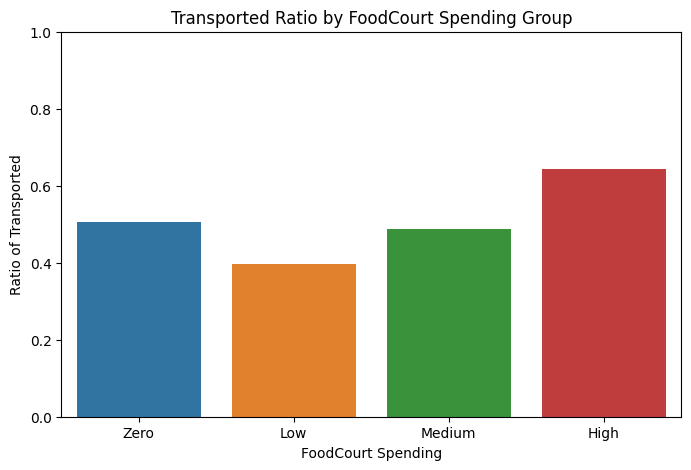

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# FoodCourtの利用額を区間に分けるための境界値を定義
# 例: 0、500、1500、3000、最大値の5つの区間に分ける
bins = [0, 500, 1500, 3000, dataset_df['FoodCourt'].max() + 1] 
labels = ['Zero', 'Low', 'Medium', 'High']

# FoodCourtの利用額をカテゴリ変数に変換
dataset_df['FoodCourt_Group'] = pd.cut(
    dataset_df['FoodCourt'], 
    bins=bins, 
    labels=labels, 
    right=False, 
    include_lowest=True 
)

# 新しいグループごとにTransportedの平均（比率）を計算
fc_transport_ratio = dataset_df.groupby('FoodCourt_Group')['Transported'].mean().reset_index()

# 列名を分かりやすく変更
fc_transport_ratio.columns = ['FoodCourt_Group', 'Transported_Ratio']

print("--- FoodCourt利用額ごとのTransported比率 ---")
print(fc_transport_ratio)

# -------------------------------------------------------------
# 結果を可視化

plt.figure(figsize=(8, 5))
sns.barplot(
    data=fc_transport_ratio, 
    x='FoodCourt_Group', 
    y='Transported_Ratio',
    order=labels 
)
plt.title('Transported Ratio by FoodCourt Spending Group')
plt.xlabel('FoodCourt Spending')
plt.ylabel('Ratio of Transported')
plt.ylim(0, 1)
plt.show()